In [10]:
import boto3
import requests,time
import matplotlib.pyplot as plt
import numpy as np
import json

In [11]:
def get_times():
    times=[]
    predict_times=[]
    for i in range(25):
        cur=time.time()
        x=requests.get('https://e9dtxz5ep9.execute-api.us-east-1.amazonaws.com/beta/mobilenet')
        if x.status_code==200:
            times.append(time.time()-cur)
            predict_times.append(float(json.loads(x.text)['body'][1:-1]))
    return times,predict_times

### Warm start Experiments with InceptionV3

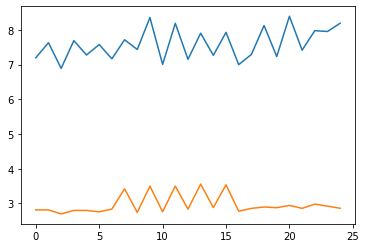

In [12]:
times_512,predict_512=get_times()
plt.plot(times_512)
plt.plot(predict_512)

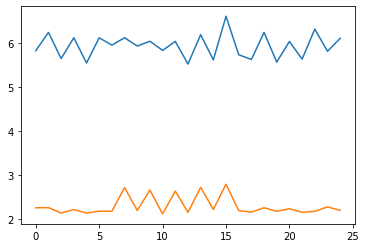

In [14]:
times_640,predict_640=get_times()
plt.plot(times_640)
plt.plot(predict_640)

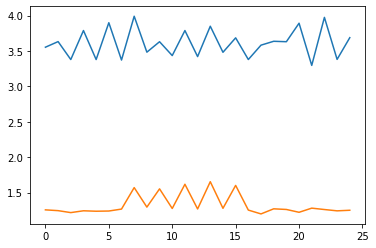

In [15]:
times_1024,predict_1024=get_times()
plt.plot(times_1024)
plt.plot(predict_1024)

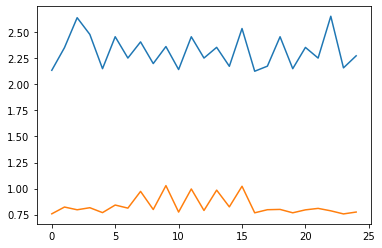

In [16]:
times_1500,predict_1500=get_times()
plt.plot(times_1500)
plt.plot(predict_1500)

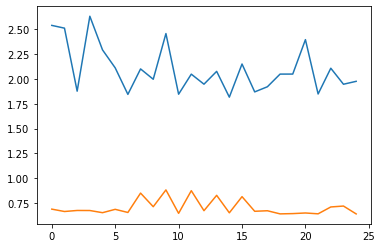

In [17]:
times_1800,predict_1800=get_times()
plt.plot(times_1800)
plt.plot(predict_1800)

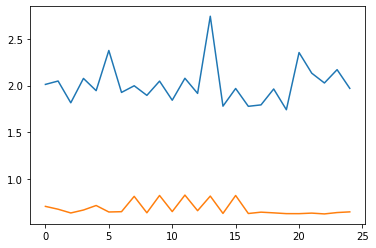

In [18]:
times_2048,predict_2048=get_times()
plt.plot(times_2048)
plt.plot(predict_2048)

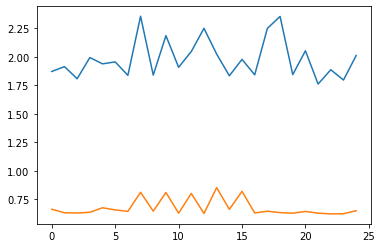

In [19]:
times_2500,predict_2500=get_times()
plt.plot(times_2500)
plt.plot(predict_2500)

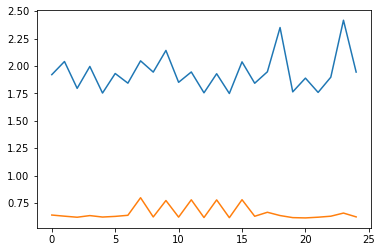

In [20]:
times_3000,predict_3000=get_times()
plt.plot(times_3000)
plt.plot(predict_3000)

[]

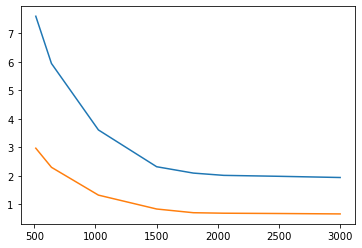

In [21]:
memories=[512,640,1024,1500,1800,2048,2500,3000]
times_avg=[np.mean(times_512),np.mean(times_640),np.mean(times_1024),np.mean(times_1500),np.mean(times_1800),np.mean(times_2048),np.mean(times_2500),np.mean(times_3000)]
predict_avg=[np.mean(predict_512),np.mean(predict_640),np.mean(predict_1024),np.mean(predict_1500),np.mean(predict_1800),np.mean(predict_2048),np.mean(predict_2500),np.mean(predict_3000)]
times_std=[np.std(times_512),np.std(times_640),np.std(times_1024),np.std(times_1500),np.std(times_1800),np.std(times_2048),np.std(times_2500),np.std(times_3000)]
predict_std=[np.std(predict_512),np.std(predict_640),np.std(predict_1024),np.std(predict_1500),np.std(predict_1800),np.std(predict_2048),np.std(predict_2500),np.std(predict_3000)]
plt.plot(memories,times_avg)
plt.plot(memories,predict_avg)
plt.plot()

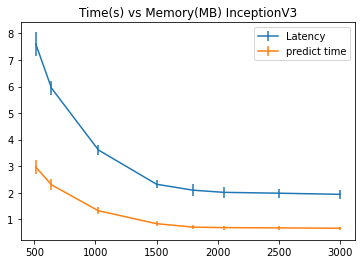

In [22]:
plt.errorbar(memories,times_avg,yerr=times_std,label="Latency")
plt.errorbar(memories,predict_avg,yerr=predict_std,label="predict time")
plt.title("Time(s) vs Memory(MB) InceptionV3")
plt.legend()
plt.show()

In [23]:
import pickle
import os
pickle.dump(times_avg,open('times_avg_mobilenet.pickle','wb'))
pickle.dump(predict_avg,open('predict_avg_mobilenet.pickle','wb'))
pickle.dump(times_std,open('times_std_mobilenet.pickle','wb'))
pickle.dump(predict_std,open('predict_std_mobilenet.pickle','wb'))

#### Cold start experiment results

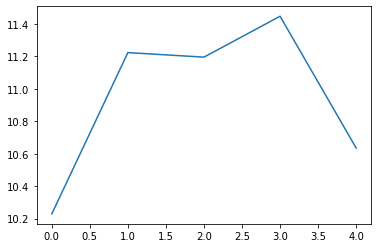

In [24]:
time_3000 = [10.229,11.223,11.195,11.447,10.635]
plt.plot(time_3000)
plt.show()

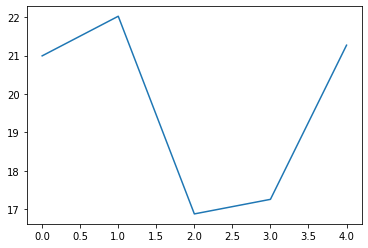

In [25]:
time_512 = [20.991,22.021,16.881,17.260,21.268]
plt.plot(time_512)
plt.show()

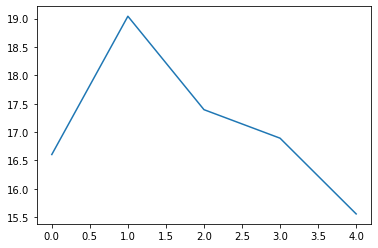

In [26]:
time_640 = [16.604,19.042,17.395,16.892,15.557]
plt.plot(time_640)
plt.show()

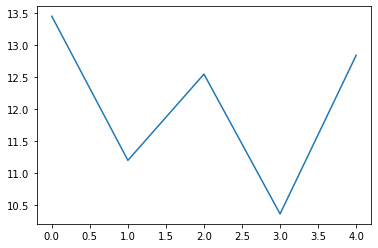

In [27]:
time_1024 = [13.448,11.194,12.543,10.357,12.837]
plt.plot(time_1024)
plt.show()

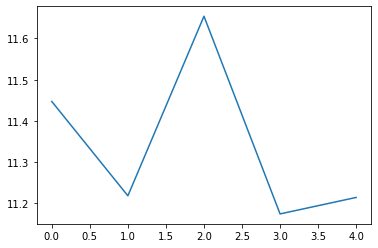

In [28]:
time_1500 = [11.447,11.218,11.654,11.174,11.214]
plt.plot(time_1500)
plt.show()

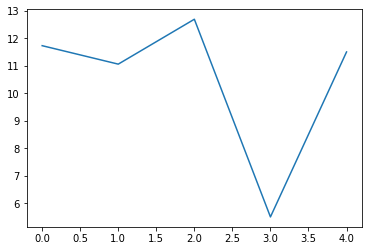

In [29]:
time_1800 = [11.724,11.054,12.684,5.506,11.496]
plt.plot(time_1800)
plt.show()

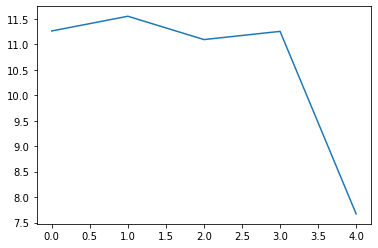

In [32]:
time_2048 = [11.262,11.551,11.093,11.254,7.670]
plt.plot(time_2048)
plt.show()

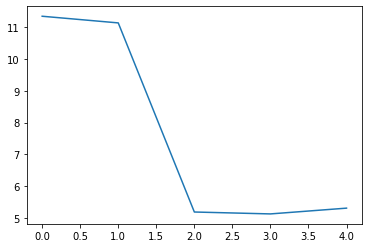

In [33]:
time_2500 = [11.349,11.139,5.179,5.119,5.301]
plt.plot(time_2500)
plt.show()

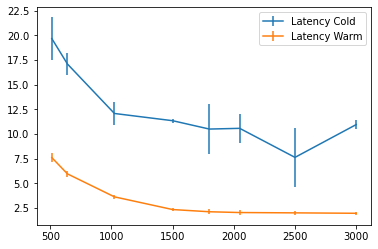

In [34]:
import pickle
memories=[512,640,1024,1500,1800,2048,2500,3000]
time_warm_avg=pickle.load(open('times_avg_mobilenet.pickle','rb'))
time_warm_std=pickle.load(open('times_std_mobilenet.pickle','rb'))
times_cold_avg=[np.mean(time_512),np.mean(time_640),np.mean(time_1024),np.mean(time_1500),np.mean(time_1800),np.mean(time_2048),np.mean(time_2500),np.mean(time_3000)]
times_cold_std=[np.std(time_512),np.std(time_640),np.std(time_1024),np.std(time_1500),np.std(time_1800),np.std(time_2048),np.std(time_2500),np.std(time_3000)]
plt.errorbar(memories,times_cold_avg,yerr=times_cold_std,label="Latency Cold")
plt.errorbar(memories,time_warm_avg,yerr=time_warm_std,label="Latency Warm")
plt.legend()
plt.show()

In [35]:
pickle.dump(times_cold_avg,open('times_cold_avg_mobilenet.pickle','wb'))
pickle.dump(times_cold_std,open('times_cold_std_mobilenet.pickle','wb'))

### Load test results

#### 512

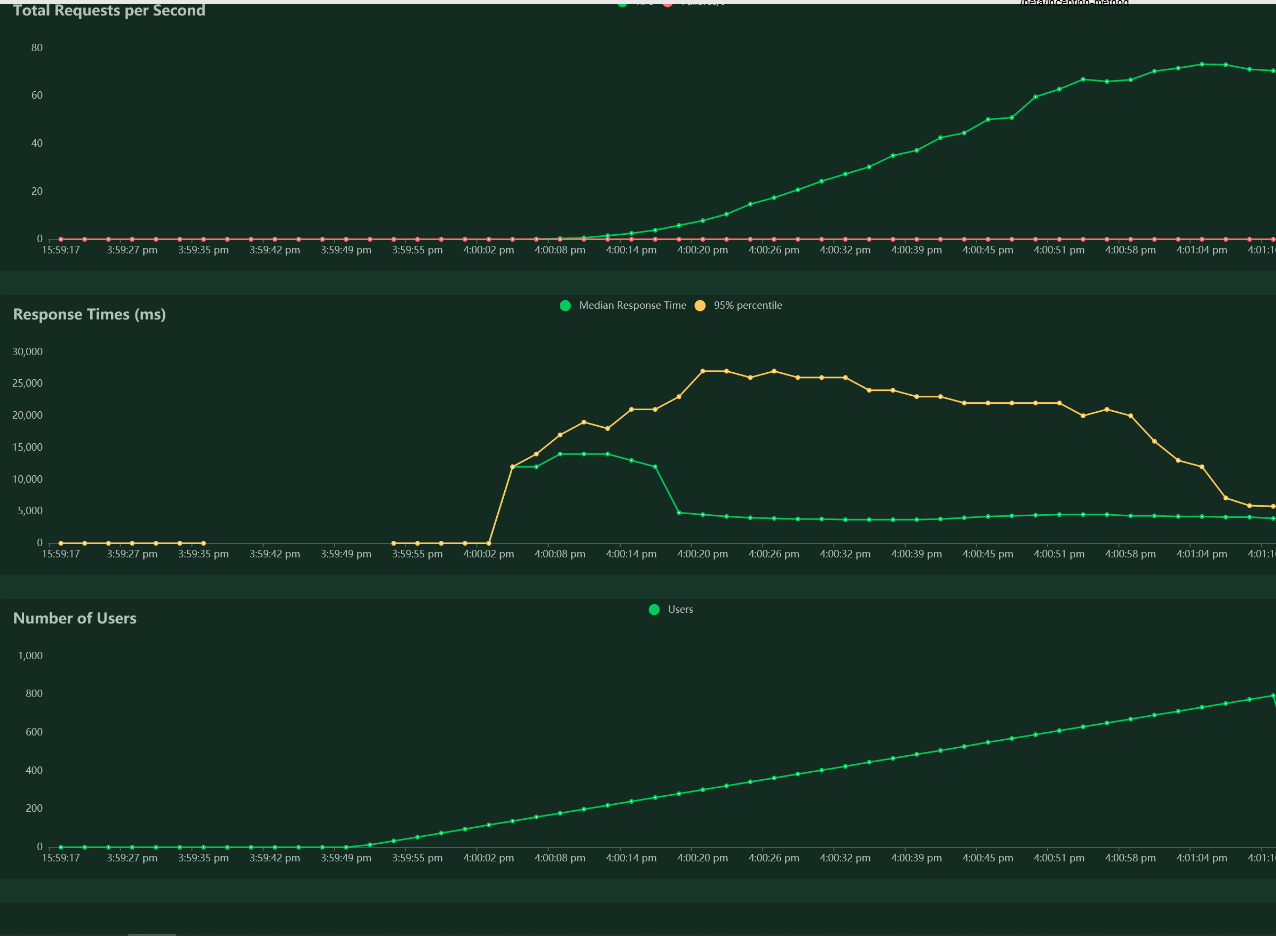

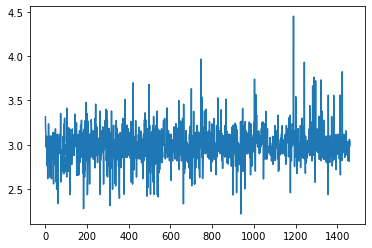

In [1]:
import matplotlib.pyplot as plt
import numpy as np
fr = open('results_512.txt','rb')
times=[]
for line in fr:
    times.append(float(line))
plt.plot(times)
plt.show()
times_512_avg = np.mean(times)

In [2]:
api_latency_avg_512=5796.533758

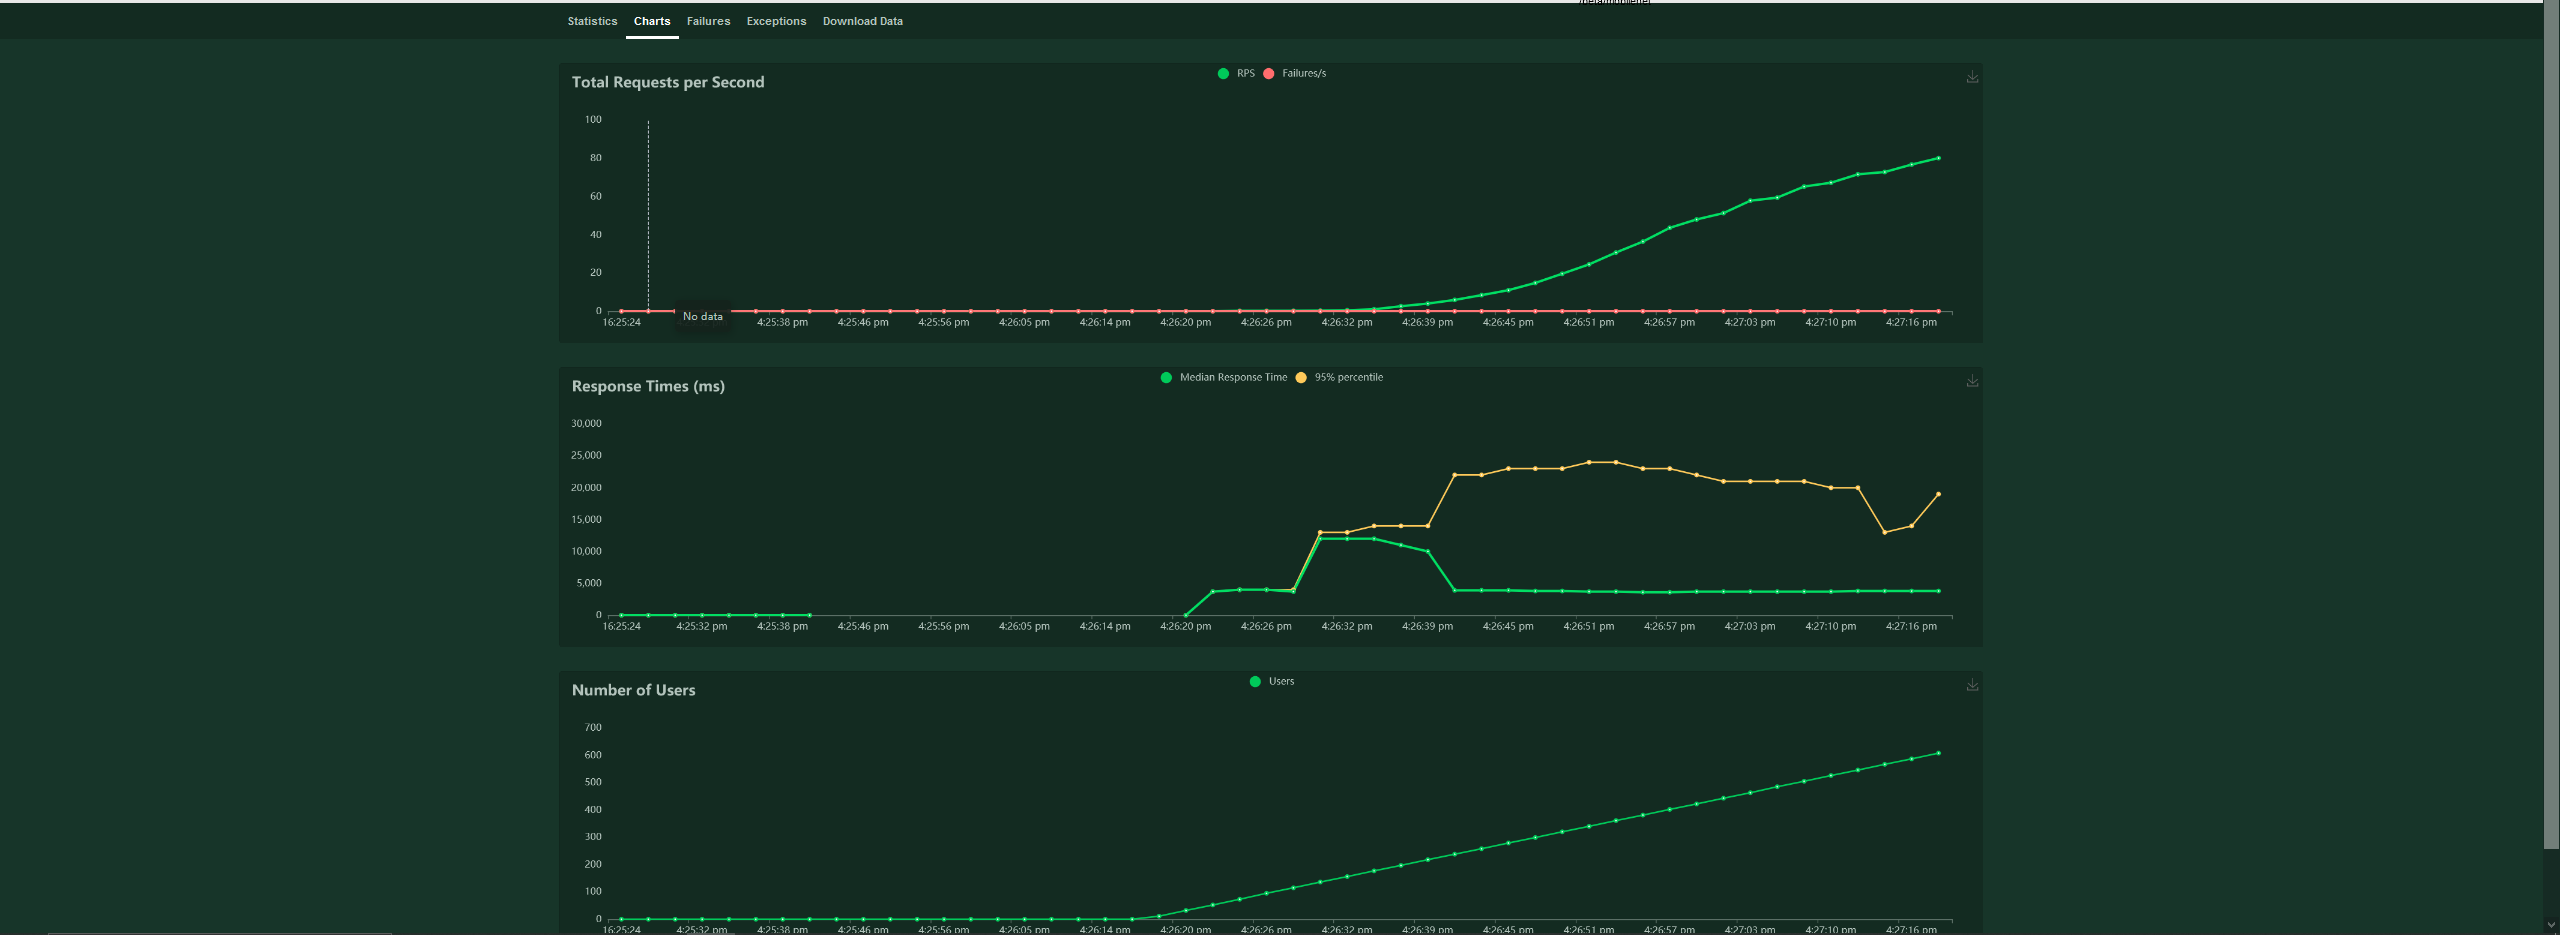

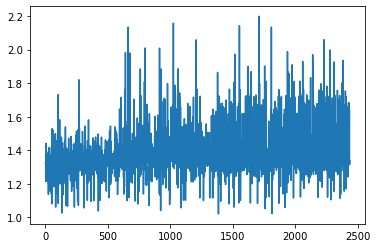

In [3]:
fr = open('results_1024.txt','rb')
times=[]
for line in fr:
    times.append(float(line))
plt.plot(times)
plt.show()
times_1024_avg = np.mean(times)

In [4]:
api_latency_avg_1024=5823.299904


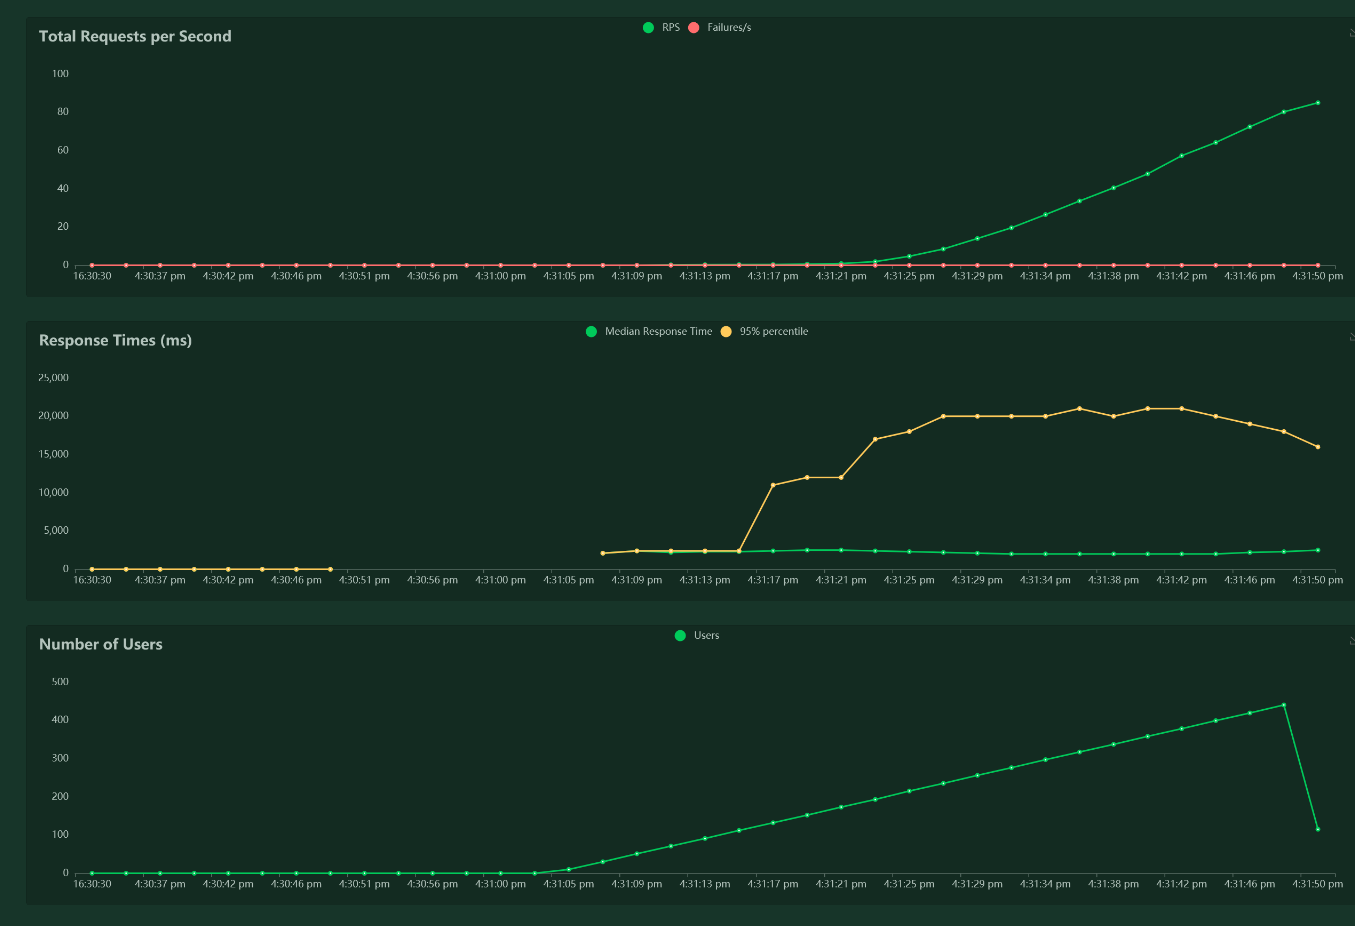

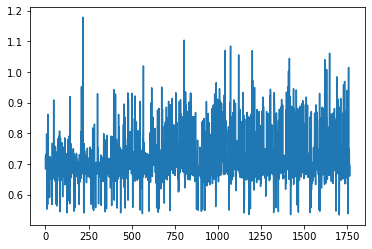

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fr = open('results_2048.txt','rb')
times=[]
for line in fr:
    times.append(float(line))
plt.plot(times)
plt.show()
times_2048_avg = np.mean(times)

In [6]:
api_latency_avg_2048=4148.981487

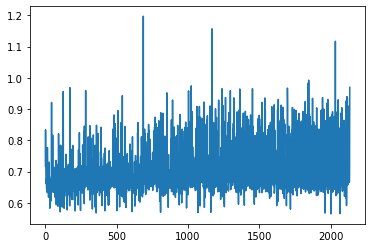

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fr = open('results_3120.txt','rb')
times=[]
for line in fr:
    times.append(float(line))
plt.plot(times)
plt.show()
times_3120_avg = np.mean(times)

In [8]:
api_latency_avg_3120=3658.027022

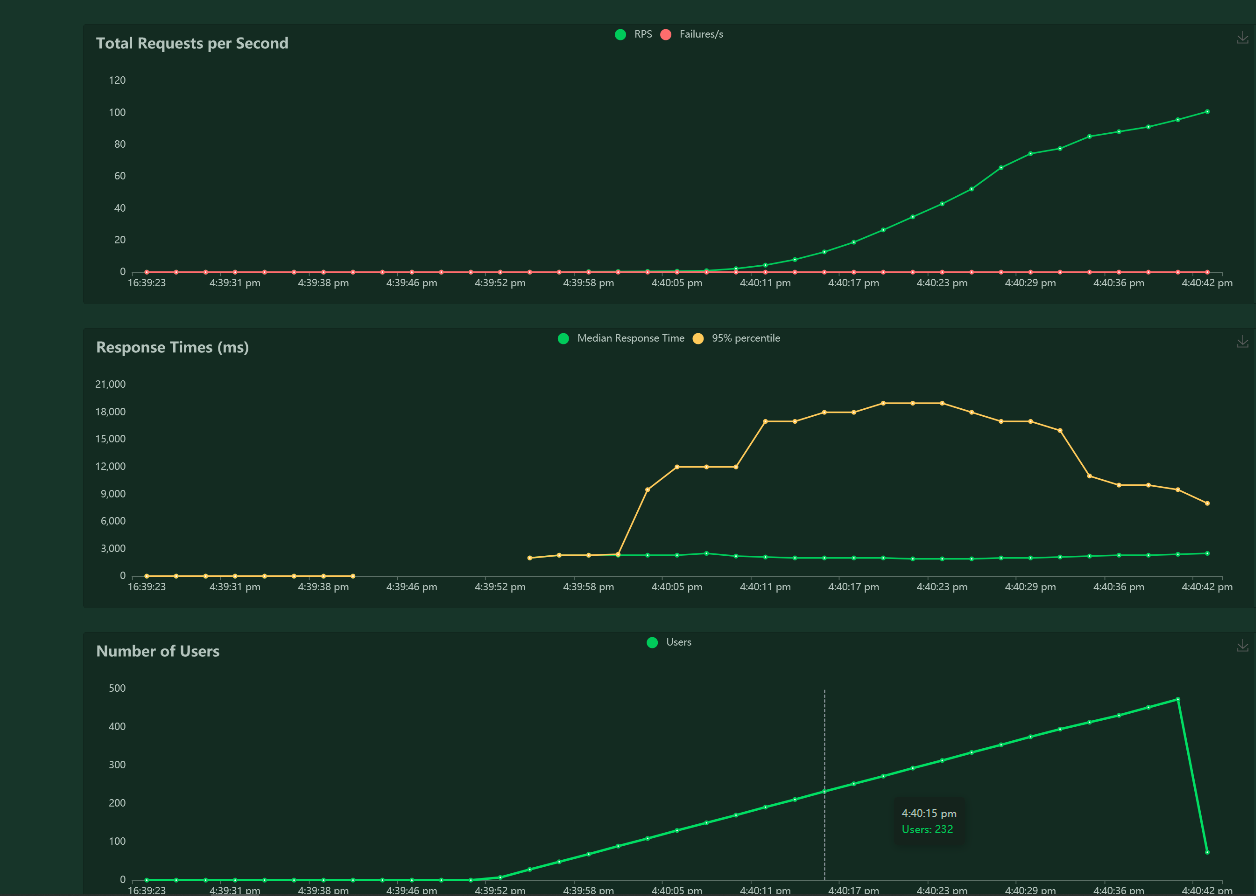

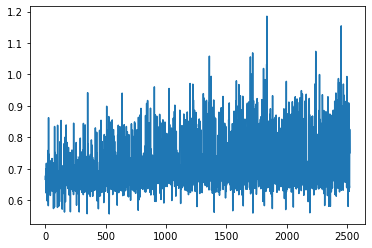

In [9]:
import matplotlib.pyplot as plt
import numpy as np
fr = open('results_4096.txt','rb')
times=[]
for line in fr:
    times.append(float(line))
plt.plot(times)
plt.show()
times_4096_avg = np.mean(times)

In [10]:
api_latency_avg_4096=3571.11078

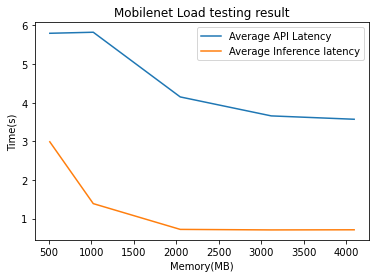

In [12]:
mem=[512,1024,2048,3120,4096]
api_load_avg=[api_latency_avg_512/1000,api_latency_avg_1024/1000,api_latency_avg_2048/1000,api_latency_avg_3120/1000,api_latency_avg_4096/1000]
predict_load_avg=[times_512_avg,times_1024_avg,times_2048_avg,times_3120_avg,times_4096_avg]
plt.plot(mem,api_load_avg,label="Average API Latency")
plt.plot(mem,predict_load_avg,label="Average Inference latency")
plt.title("Mobilenet Load testing result")
plt.legend()
plt.xlabel("Memory(MB)")
plt.ylabel("Time(s)")
plt.show()